In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta

## 1. Lecture Données CSV du tournoi des 6 nations

In [2]:
dfMatches = pd.read_csv('data/6nations/2023/matches_final.csv', parse_dates=['datetime', 'datetime_paris'])
dfMatches.head(3)  #.tail(3)

,guid,uuid,datetime,datetime_paris,round,teamA_name,teamA_shortName,teamB_name,teamB_shortName,score_teamA,...,htscore_teamB,status,minutes,referee_firstName,referee_lastName,referee_knownAs,venue_name,venue_location,venue_timezone,attendance
0,22WI1234,8a908178-2222-4952-9759-62f1d7d7ed6b,2023-02-04 14:15:00+00:00,2023-02-04 15:15:00+01:00,1,Pays de Galles,WALE,Irlande,IREL,10,...,27,Res,80,Karl,Dickson,Karl Dickson,Principality Stadium,Cardiff,Europe/London,74500
1,22ES1234,63d81950-41cd-43f4-b5ad-9ef1b68b673c,2023-02-04 16:45:00+00:00,2023-02-04 17:45:00+01:00,1,Angleterre,ENGL,Écosse,SCOT,23,...,12,Res,80,Paul,Williams,Paul Williams,Twickenham,London,Europe/London,0
2,22IF1234,b0354f39-fa83-4fb7-817d-d64d06e956eb,2023-02-05 15:00:00+00:00,2023-02-05 16:00:00+01:00,1,Italie,ITAL,France,FRAN,24,...,19,Res,80,Matthew,Carley,Matthew Carley,Stadio Olimpico,Rome,Europe/Rome,41232


In [3]:
dStatPlayers = pd.read_csv('data/6nations/2023/players_final.csv')
dStatPlayers.head(3)

,game_guid,team,uuid,guid,firstName,lastName,position,starter,MP,T,...,TW,TC,HE,PC,OPC,SPC,LW,LS,YC,RC
0,22WI1234,teamA,0a53a3d1-ed03-4d88-92e2-243e1f205908,LW454197,Liam,Williams,15,True,0,0,...,1,0,0,2,0,0,0,0,0,0
1,22WI1234,teamA,9251b023-6fe1-43e3-8606-a488a6e5269a,JA935900,Josh,Adams,14,True,0,0,...,0,0,0,1,0,0,0,0,0,0
2,22WI1234,teamA,7fd1fa2d-77f1-4427-8000-45ff3ebf24fd,GN107642,George,North,13,True,0,0,...,1,0,1,0,0,0,1,0,0,0


In [4]:
dfMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype                               
---  ------             --------------  -----                               
 0   guid               15 non-null     object                              
 1   uuid               15 non-null     object                              
 2   datetime           15 non-null     datetime64[ns, UTC]                 
 3   datetime_paris     15 non-null     datetime64[ns, pytz.FixedOffset(60)]
 4   round              15 non-null     int64                               
 5   teamA_name         15 non-null     object                              
 6   teamA_shortName    15 non-null     object                              
 7   teamB_name         15 non-null     object                              
 8   teamB_shortName    15 non-null     object                              
 9   score_teamA        15 non-null     int64     

In [5]:
dfMatches.tail(3)

,guid,uuid,datetime,datetime_paris,round,teamA_name,teamA_shortName,teamB_name,teamB_shortName,score_teamA,...,htscore_teamB,status,minutes,referee_firstName,referee_lastName,referee_knownAs,venue_name,venue_location,venue_timezone,attendance
12,22SI5678,590f8a53-8ce2-4725-a1a1-d1200afab3fb,2023-03-18 12:30:00+00:00,2023-03-18 13:30:00+01:00,5,Écosse,SCOT,Italie,ITAL,26,...,6,Res,80,Angus,Gardner,Angus Gardner,BT Murrayfield,Edinburgh,Europe/London,0
13,22FW1234,27d20888-4df6-4b84-ae45-23d0950f0032,2023-03-18 14:45:00+00:00,2023-03-18 15:45:00+01:00,5,France,FRAN,Pays de Galles,WALE,41,...,7,Res,80,Nic,Berry,Nic Berry,Stade de France,Paris,Europe/Paris,0
14,22IE1234,71e364e6-8e4f-4dac-a756-023690665caa,2023-03-18 17:00:00+00:00,2023-03-18 18:00:00+01:00,5,Irlande,IREL,Angleterre,ENGL,29,...,6,Res,80,Jaco,Peyper,Jaco Peyper,Aviva Stadium,Dublin,Europe/Dublin,0


## 2. Données temporelles avec Python

### Construction à partir des composantes

In [6]:
hier = date(2023,3,13)
print(hier)
hier

2023-03-13


datetime.date(2023, 3, 13)

In [7]:
hier_a_17h30 = datetime(2023,3,13,17,30)
print(hier_a_17h30)
print(hier_a_17h30.date())
print(hier_a_17h30.time())
print(hier_a_17h30.year)
print(hier_a_17h30.month)
print(hier_a_17h30.day)
print(hier_a_17h30.hour)
# etc...
hier_a_17h30

2023-03-13 17:30:00
2023-03-13
17:30:00
2023
3
13
17


datetime.datetime(2023, 3, 13, 17, 30)

In [8]:
heureLever = time(7,15)
print(heureLever)
heureLever

07:15:00


datetime.time(7, 15)

### Conversion texte <-> donnée temporelle avec format
Doc ici sur les formats: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [9]:
dateIso = '2023-03-13'
datetimeIso = '2020-02-29 18:05:04'
dateFr = '29/02/2000'
dateUs = '2/29/2000'

In [10]:
date1 = date.fromisoformat(dateIso)
date1

datetime.date(2023, 3, 13)

In [11]:
datetime1 = datetime.fromisoformat(datetimeIso)
datetime1

datetime.datetime(2020, 2, 29, 18, 5, 4)

In [12]:
date2 = datetime.strptime(dateFr, '%d/%m/%Y').date()
date2

datetime.date(2000, 2, 29)

In [13]:
datetime.strptime(dateUs, '%m/%d/%Y').date()

datetime.date(2000, 2, 29)

In [14]:
# error pas de mois 29
# datetime.strptime(dateUs, '%d/%m/%Y').date()

# erreur sur les 29 février d'années non bissextiles
# datetime.strptime('29/2/2023', '%d/%m/%Y').date()

In [15]:
print(datetime1)  # ISO format par défaut
print(datetime1.strftime('%d/%m/%Y %H:%M')) # FR format jusqu'aux minutes 
print(f"Formation a lieu le {datetime1:%d/%m/%Y à %H:%M}") # Format inside formatted string

2020-02-29 18:05:04
29/02/2020 18:05
Formation a lieu le 29/02/2020 à 18:05


## 3. Sélection temporelles avec Pandas

In [16]:
# Q1. extraire les matches du 11 mars 2023
# TODO

In [17]:
# Q2. extraire les matches du 11 au 12 mars 2023
# TODO

In [18]:
# Q3. extraire les matches de mars
# étape intermédiaire; extraire le mois
dfMatches.datetime_paris.dt.month

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     3
10    3
11    3
12    3
13    3
14    3
Name: datetime_paris, dtype: int64

In [19]:
# match du mois de mars
dfMatches.loc[
    dfMatches.datetime_paris.dt.month == 3, 
    ['datetime_paris', 'teamA_name', 'teamB_name', 'score_teamA', 'score_teamB']
]

,datetime_paris,teamA_name,teamB_name,score_teamA,score_teamB
9,2023-03-11 15:15:00+01:00,Italie,Pays de Galles,17,29
10,2023-03-11 17:45:00+01:00,Angleterre,France,10,53
11,2023-03-12 16:00:00+01:00,Écosse,Irlande,7,22
12,2023-03-18 13:30:00+01:00,Écosse,Italie,26,14
13,2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28
14,2023-03-18 18:00:00+01:00,Irlande,Angleterre,29,16


In [20]:
# Q4. matches finis du mois de mars
dfMatches.loc[
    (dfMatches.datetime_paris.dt.month == 3) & (dfMatches.status == 'Res'), 
    ['datetime_paris', 'teamA_name', 'teamB_name', 'score_teamA', 'score_teamB']
]

,datetime_paris,teamA_name,teamB_name,score_teamA,score_teamB
9,2023-03-11 15:15:00+01:00,Italie,Pays de Galles,17,29
10,2023-03-11 17:45:00+01:00,Angleterre,France,10,53
11,2023-03-12 16:00:00+01:00,Écosse,Irlande,7,22
12,2023-03-18 13:30:00+01:00,Écosse,Italie,26,14
13,2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28
14,2023-03-18 18:00:00+01:00,Irlande,Angleterre,29,16


In [21]:
# Q5. matches de l'équipe de France
dfMatchesFrance = dfMatches.loc[
    (dfMatches.teamA_name == 'France') | (dfMatches.teamB_name == 'France'),
    ['datetime_paris', 'teamA_name', 'teamB_name', 'score_teamA', 'score_teamB']
]
dfMatchesFrance

,datetime_paris,teamA_name,teamB_name,score_teamA,score_teamB
2,2023-02-05 16:00:00+01:00,Italie,France,24,29
3,2023-02-11 15:15:00+01:00,Irlande,France,32,19
8,2023-02-26 16:00:00+01:00,France,Écosse,32,21
10,2023-03-11 17:45:00+01:00,Angleterre,France,10,53
13,2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28


In [22]:
# Différence de temps entre les 2 premiers matches
dfMatchesFrance.loc[3, 'datetime_paris'] - dfMatchesFrance.loc[2, 'datetime_paris']

Timedelta('5 days 23:15:00')

## 4. Statistiques Joueurs

### 4.1. Renommage des colonnes suivant la légende (un peu bugguée)

In [23]:
# Liste des colonnes (pas très lisible sans légende)
dStatPlayers.columns

Index(['game_guid', 'team', 'uuid', 'guid', 'firstName', 'lastName',
       'position', 'starter', 'MP', 'T', 'Es E', 'P', 'D', 'M', 'Transf. E',
       'PK(%)', 'MK', 'BH(%)', 'PM', 'PAC', 'BTs', 'Kon', 'TM', 'AM', 'TS(%)',
       'DT(%)', 'TW', 'TC', 'HE', 'PC', 'OPC', 'SPC', 'LW', 'LS', 'YC', 'RC'],
      dtype='object')

In [24]:
# informations sur chaque colonne et nombre de ligne
dStatPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_guid  690 non-null    object
 1   team       690 non-null    object
 2   uuid       690 non-null    object
 3   guid       690 non-null    object
 4   firstName  690 non-null    object
 5   lastName   690 non-null    object
 6   position   690 non-null    int64 
 7   starter    690 non-null    bool  
 8   MP         690 non-null    int64 
 9   T          690 non-null    int64 
 10  Es E       690 non-null    int64 
 11  P          690 non-null    int64 
 12  D          690 non-null    int64 
 13  M          690 non-null    int64 
 14  Transf. E  690 non-null    int64 
 15  PK(%)      690 non-null    int64 
 16  MK         690 non-null    int64 
 17  BH(%)      690 non-null    int64 
 18  PM         690 non-null    int64 
 19  PAC        690 non-null    int64 
 20  BTs        690 non-null    int64

**NB**: Il y a un problème sur la légende (2 fois la lettre T) et sur la colonne 'Transf. E' qui est mal nommmée (mais utilisée en cohérence dans les 2 tableaux)

Enquête sur 2 joueurs pour savoir la colonne T, concerne les Essais (tries) ou les Transformations

In [25]:
# Marqueurs de beaucoup de transformations
dStatPlayers.loc[
    (dStatPlayers.lastName == 'Ramos'),
    ['MP', 'T', 'Es E', 'P', 'D']
]

,MP,T,Es E,P,D
107,0,3,0,1,0
153,0,1,0,3,1
368,0,3,0,2,0
475,0,6,0,2,0
598,0,5,2,2,0


In [26]:
# Marqueurs de beaucoup d'essais
dStatPlayers.loc[
    (dStatPlayers.lastName == 'Penaud'),
    ['MP', 'T', 'Es E', 'P', 'D']
]

,MP,T,Es E,P,D
108,0,0,0,0,0
154,0,0,0,0,0
369,0,0,0,0,0
476,0,0,0,0,0
599,0,0,1,0,0


In [27]:
# Du coup on se débarasse dans la légende du "T" des essais (ligne 1)
# et on indexe le tableau par la colonne key pour l'exploiter plus facilement
dfLegend = pd.read_csv('data/6nations/2023/legend.csv')
# dfLegend.loc[3,'key'] = 'Transf. E'
# dfLegend.loc[7,'key'] = 'Duel'
dfLegend = dfLegend.drop(index=1).set_index('key')
dfLegend

,label
key,
MP,Minutes jouées
Es E,Passes décisives
T,Transformations
P,Penalty Goals
D,Drops
M,Metres Made
Transf. E,Ballons joués à la main
PK(%),Possession Kicked (%)
MK,Metres Kicked


In [28]:
dfStatOF = dStatPlayers.loc[
    (dStatPlayers.lastName == 'Farrell') & (dStatPlayers.firstName == 'Owen'),
    []
]
dfStatOF

""
49
235
342
496
664


In [29]:
# on cherche à renommer les colonnes en utilsant la légende
#
# étape intermédiaire: on affiche les correspondances pour les colonnes présentes dans la légende
for col in dStatPlayers.columns:
    if col in dfLegend.index:
        print(col, '->', dfLegend.loc[col,'label'])
    

MP -> Minutes jouées
T -> Transformations
Es E -> Passes décisives
P -> Penalty Goals
D -> Drops
M -> Metres Made
Transf. E -> Ballons joués à la main
PK(%) -> Possession Kicked (%)
MK -> Metres Kicked
BH(%) -> Ball played by hand (%)
PM -> Passes
PAC -> Passes après contact
BTs -> Broken Tackles
Kon -> Knock Ons
TM -> Plaqués faits
AM -> Plaquages manqués
TS(%) -> Tackle success (%)
DT(%) -> Dominant Tackles (%)
TW -> Turnovers effectués
TC -> Turnovers concédés
HE -> Handling errors
PC -> Pens conceded
OPC -> Offside penalties
SPC -> Scrum penalties
LW -> Touches gagnées
LS -> Lineouts stolen
YC -> Cartons jaunes
RC -> Carton rouge


In [30]:
# on peut procéder au renommage en fabriquant une nouvelle liste de noms de colonnes
columns_new = []
for col in dStatPlayers.columns:
    if col in dfLegend.index:
        columns_new.append(dfLegend.loc[col,'label'])
    else:
        columns_new.append(col)
dStatPlayers.columns = columns_new

In [31]:
# on peut procéder à quelques réajustements (ici mettre au singulier Cartons Jaunes')
# avant d'écrire cette colonne, on peut juste afficher la liste des colonnes pour 
# ensuite la copier:
#
# dStatPlayers.columns
#
dStatPlayers.columns = ['game_guid', 'team', 'uuid', 'guid', 'firstName', 'lastName',
       'position', 'starter', 'Minutes jouées', 'Transformations',
       'Passes décisives', 'Penalty Goals', 'Drops', 'Metres Made',
       'Ballons joués à la main', 'Possession Kicked (%)', 'Metres Kicked',
       'Ball played by hand (%)', 'Passes', 'Passes après contact',
       'Broken Tackles', 'Knock Ons', 'Plaqués faits', 'Plaquages manqués',
       'Tackle success (%)', 'Dominant Tackles (%)', 'Turnovers effectués',
       'Turnovers concédés', 'Handling errors', 'Pens conceded',
       'Offside penalties', 'Scrum penalties', 'Touches gagnées',
       'Lineouts stolen', 'Carton jaune', 'Carton rouge']

### 4.2. Stats sur Owen Farrell

In [32]:
# quelques stats sur Owen Farrell
dfStatOF = dStatPlayers.loc[ 
    dStatPlayers.lastName == 'Farrell',
    ['Minutes jouées', 'Metres Made', 'Passes', 'Metres Kicked']
]
dfStatOF

,Minutes jouées,Metres Made,Passes,Metres Kicked
49,0,56,21,45
235,0,19,20,361
342,0,23,20,365
496,0,44,11,16
664,0,44,20,500


In [33]:
# totaux sur les stats d'OF
totauxOF = dfStatOF.sum(axis=0)
totauxOF

Minutes jouées       0
Metres Made        186
Passes              92
Metres Kicked     1287
dtype: int64

In [34]:
# en ramenant sur le nombre de matches
# NB: pb OF a peut jouer sur le match 4
totauxOF / len(dfStatOF)

Minutes jouées      0.0
Metres Made        37.2
Passes             18.4
Metres Kicked     257.4
dtype: float64

### 4.3. Totaux pour chaque joueur sur l'ensemble du tournoi
#### a. par identifiant, prénom et nom
On regroupe par identifiant unique de joueur (guid) puis prénom et nom pour avoir une indexation lisible

In [35]:
columns_stats = ['Transformations',
       'Passes décisives', 'Penalty Goals', 'Drops', 'Metres Made',
       'Ballons joués à la main', 'Possession Kicked (%)', 'Metres Kicked',
       'Ball played by hand (%)', 'Passes', 'Passes après contact',
       'Broken Tackles', 'Knock Ons', 'Plaqués faits', 'Plaquages manqués',
       'Tackle success (%)', 'Dominant Tackles (%)', 'Turnovers effectués',
       'Turnovers concédés', 'Handling errors', 'Pens conceded',
       'Offside penalties', 'Scrum penalties', 'Touches gagnées',
       'Lineouts stolen', 'Carton jaune', 'Carton rouge']
dfStatPlayersSums = dStatPlayers.groupby(by=['guid', 'firstName', 'lastName'])[columns_stats].sum()
dfStatPlayersSums

,,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
guid,firstName,lastName,,,,,,,,,,,,,,,,,,,,,
AB882295,Adam,Beard,0,0,0,0,77,24,0,0,500,27,...,3,0,3,7,1,0,13,1,0,0
AC249727,Ange,Capuozzo,0,0,0,0,301,36,0,207,256,20,...,1,0,2,2,1,0,0,0,0,0
AC437780,Alex,Cuthbert,0,0,0,0,75,12,0,37,191,2,...,0,0,1,0,0,0,0,0,0,0
AD427633,Antoine,Dupont,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0
AD528464,Alex,Dombrandt,0,1,0,0,265,48,0,0,500,20,...,3,0,5,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TW860822,Tomos,Williams,0,1,0,0,70,22,0,984,400,227,...,0,0,6,4,1,0,1,0,0,0
UA499525,Uini,Atonio,0,0,0,0,39,7,0,0,300,5,...,0,0,1,2,1,0,0,0,0,0
WN551420,WP,Nel,0,0,0,0,8,2,0,0,400,4,...,0,0,2,2,0,0,0,0,0,0


In [36]:
# Ligne de stat d'Antoine Dupont: à partir du guid (1er niveau d'index)
dfStatPlayersSums.loc['AD427633']

,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
firstName,lastName,,,,,,,,,,,,,,,,,,,,,
Antoine,Dupont,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0


In [37]:
# Ligne de stat d'Antoine Dupont: à partir du prénom et nom (2e et 3e niveaux d'index)
# on comble le 1er niveau par un slice(None) équivalent à toute valeur
dfStatPlayersSums.loc[(slice(None),'Antoine','Dupont')]

,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
guid,,,,,,,,,,,,,,,,,,,,,
AD427633,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0


#### b. par nom, prénom et guid
NB: on garde le guid en cas d'homonymes dans le tournoi pour ne pas les regrouper sur la même ligne

In [38]:
dfStatPlayersSums = dStatPlayers.groupby(by=['lastName','firstName','guid'])[columns_stats].sum()
dfStatPlayersSums

,,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
lastName,firstName,guid,,,,,,,,,,,,,,,,,,,,,
Adams,Josh,JA935900,0,0,0,0,148,24,0,342,372,12,...,1,0,1,1,0,0,0,0,0,0
Aki,Bundee,BA768636,0,2,0,0,271,45,0,0,500,14,...,2,0,2,3,0,0,0,0,0,0
Aldegheri,Dorian,DA764197,0,0,0,0,0,0,0,0,100,1,...,0,0,0,1,0,0,0,0,0,0
Allan,Tommaso,TA522224,4,1,7,0,327,45,0,843,431,106,...,0,0,12,1,0,0,3,0,0,0
Alldritt,Gregory,GA508879,0,1,0,0,246,46,0,5,494,8,...,3,0,2,2,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zanon,Marco,MZ899300,0,0,0,0,23,4,0,0,100,1,...,0,0,0,0,0,0,0,0,0,0
Zuliani,Manuel,MZ598684,0,0,0,0,134,23,0,35,393,12,...,4,0,1,1,0,0,1,0,0,0
van Poortvliet,Jack,JV904195,0,1,0,0,69,22,0,1396,418,265,...,0,0,10,1,0,0,0,0,0,0


In [39]:
# Il est plus facile d'accéder à un jour par son nom nom désormais (1er niveau d'index)
# i.e. dfStatPlayersSums.loc[('Dupont', slice(None), slice(None))]
dfStatPlayersSums.loc['Dupont']

,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
firstName,guid,,,,,,,,,,,,,,,,,,,,,
Antoine,AD427633,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0


In [40]:
# en fournissant les 2 premiers niveaux d'index
# i.e. dfStatPlayersSums.loc[('Dupont','Antoine', slice(None))]
dfStatPlayersSums.loc[('Dupont','Antoine')]


,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
guid,,,,,,,,,,,,,,,,,,,,,
AD427633,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0


In [41]:
# en fournissant tous les niveaux d'index
dfStatPlayersSums.loc[('Dupont','Antoine','AD427633')]

Transformations               0
Passes décisives              4
Penalty Goals                 0
Drops                         0
Metres Made                 253
Ballons joués à la main      51
Possession Kicked (%)         0
Metres Kicked              1585
Ball played by hand (%)     432
Passes                      279
Passes après contact          7
Broken Tackles               17
Knock Ons                     1
Plaqués faits                54
Plaquages manqués             5
Tackle success (%)          457
Dominant Tackles (%)         26
Turnovers effectués           1
Turnovers concédés            0
Handling errors              10
Pens conceded                 4
Offside penalties             4
Scrum penalties               0
Touches gagnées               1
Lineouts stolen               0
Carton jaune                  0
Carton rouge                  0
Name: (Dupont, Antoine, AD427633), dtype: int64

In [42]:
# en fournissant une liste de valeurs sur le 1er niveau d'index
#
# équivalent à 
# dfStatPlayersSums.loc[
#    (                                            # parenthèses pour isoler la sélection sur les lignes
#        ['Dupont','Farrell','Ramos','Penaud'],   # 1er niveau d'index de ligne
#        slice(None),                             # 2ème niveau d'index de ligne
#        slice(None)                              # 3ème niveau d'index de ligne
#    )
# ]
#
# en simplifié:
dfStatPlayersSums.loc[['Dupont','Farrell','Ramos','Penaud']]

,,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
lastName,firstName,guid,,,,,,,,,,,,,,,,,,,,,
Dupont,Antoine,AD427633,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0
Farrell,Owen,OF274612,5,0,6,0,186,30,0,1287,380,92,...,2,0,3,1,0,0,0,0,0,0
Ramos,Thomas,TR524244,18,2,10,1,502,50,0,1351,361,54,...,1,0,4,3,1,0,0,0,0,0
Penaud,Damian,DP646434,0,1,0,0,397,28,0,194,416,20,...,0,0,5,1,0,0,0,0,0,0


In [43]:
# en fournissant uniquement le 2e niveau d'index de ligne
dfStatPlayersSums.loc[(slice(None), 'Gregory', slice(None))]

,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
lastName,guid,,,,,,,,,,,,,,,,,,,,,
Alldritt,GA508879,0,1,0,0,246,46,0,5,494,8,...,3,0,2,2,0,0,4,0,0,0


In [44]:
# en fournissant des valeurs d'index sur les lignes puis les colonnes
dfStatPlayersSums.loc[
    ['Dupont','Farrell','Ramos','Penaud'],      # sélection ligne
    ['Metres Made', 'Passes', 'Metres Kicked']  # sélection colonne
]

,,,Metres Made,Passes,Metres Kicked
lastName,firstName,guid,,,
Dupont,Antoine,AD427633,253,279,1585
Farrell,Owen,OF274612,186,92,1287
Ramos,Thomas,TR524244,502,54,1351
Penaud,Damian,DP646434,397,20,194


### 4.4. Maximums sur chaque stat

In [45]:

dfStatPlayersSums.max()

Transformations              18
Passes décisives              4
Penalty Goals                10
Drops                         1
Metres Made                 562
Ballons joués à la main      62
Possession Kicked (%)         0
Metres Kicked              1665
Ball played by hand (%)     500
Passes                      282
Passes après contact          9
Broken Tackles               35
Knock Ons                     4
Plaqués faits                83
Plaquages manqués            17
Tackle success (%)          500
Dominant Tackles (%)        100
Turnovers effectués           5
Turnovers concédés            0
Handling errors              13
Pens conceded                13
Offside penalties             4
Scrum penalties               0
Touches gagnées              39
Lineouts stolen               5
Carton jaune                  0
Carton rouge                  0
dtype: int64

### 4.5. Top 3 passeur

In [46]:
dfStatPlayersSums.sort_values('Passes', ascending=False).head(3)

,,,Transformations,Passes décisives,Penalty Goals,Drops,Metres Made,Ballons joués à la main,Possession Kicked (%),Metres Kicked,Ball played by hand (%),Passes,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
lastName,firstName,guid,,,,,,,,,,,,,,,,,,,,,
White,Ben,BW742198,0,2,0,0,86,27,0,1010,451,282,...,0,0,10,0,0,0,0,0,0,0
Dupont,Antoine,AD427633,0,4,0,0,253,51,0,1585,432,279,...,1,0,10,4,4,0,1,0,0,0
van Poortvliet,Jack,JV904195,0,1,0,0,69,22,0,1396,418,265,...,0,0,10,1,0,0,0,0,0,0


In [47]:
dfStatPlayersSums.sort_values('Passes', ascending=False)['Passes'].head(3)

lastName        firstName  guid    
White           Ben        BW742198    282
Dupont          Antoine    AD427633    279
van Poortvliet  Jack       JV904195    265
Name: Passes, dtype: int64

In [48]:
top3passes = dfStatPlayersSums.sort_values('Passes', ascending=False)[['Passes', 'Passes après contact', 'Passes décisives']].head(3)
top3passes

,,,Passes,Passes après contact,Passes décisives
lastName,firstName,guid,,,
White,Ben,BW742198,282,3,2
Dupont,Antoine,AD427633,279,7,4
van Poortvliet,Jack,JV904195,265,4,1


## 5. Graphiques

<AxesSubplot:xlabel='lastName,firstName,guid'>

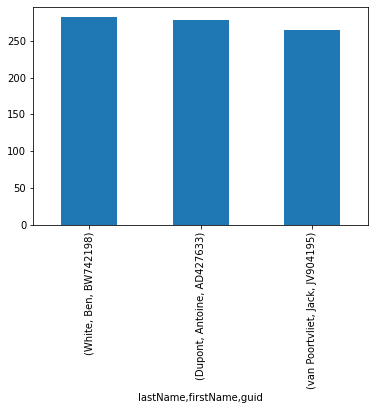

In [51]:
# teaser for last session
top3passes.Passes.plot(kind='bar')

<AxesSubplot:xlabel='lastName,firstName,guid'>

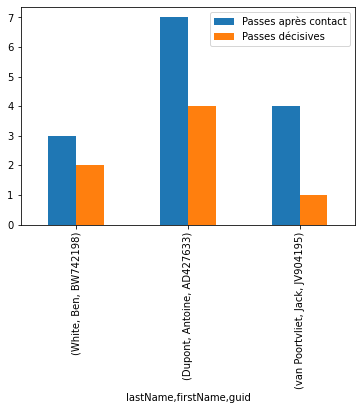

In [52]:
top3passes[['Passes après contact', 'Passes décisives']].plot(kind='bar')

<BarContainer object of 3 artists>

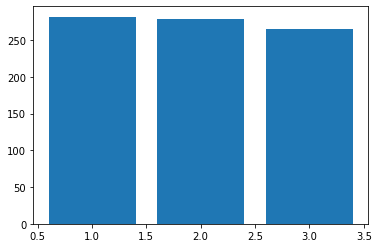

In [64]:
fig, ax = plt.subplots()
ax.bar([1,2,3], top3passes.Passes)

<AxesSubplot:xlabel='lastName,firstName,guid'>

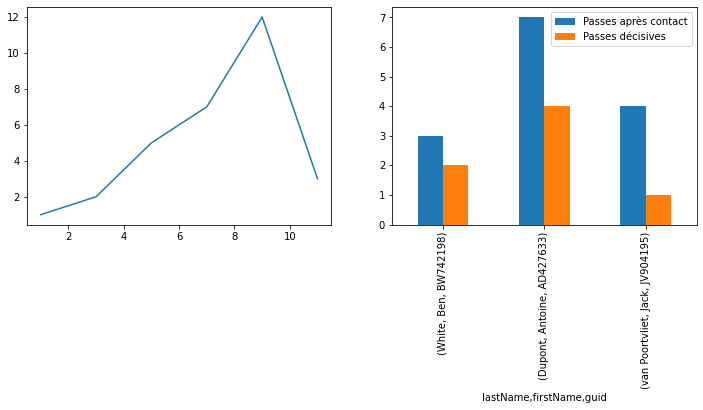

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_figwidth(12)  # or fig.set_size_inches(12,6) or fig.set_figheight(6)
ax1.plot(
    list(range(1,13,2)),  # abscisses
    [1, 2, 5 ,7, 12, 3]   # ordonnées
)
top3passes[['Passes après contact', 'Passes décisives']].plot(kind='bar', ax=ax2)

1. Evolution du nombre de points par l'équipe de France
2. Ajouter les points de l'équipe adverse

In [83]:
dfMatchesFrance = dfMatches.loc[
    (dfMatches.teamA_name == 'France') | (dfMatches.teamB_name == 'France'),
    ['datetime_paris', 'teamA_name', 'teamB_name', 'score_teamA', 'score_teamB']
]
dfMatchesFrance['score_France'] = dfMatchesFrance.score_teamA.where(dfMatchesFrance.teamA_name == 'France', dfMatchesFrance.score_teamB)
dfMatchesFrance['score_Other'] = dfMatchesFrance.score_teamA.where(dfMatchesFrance.teamA_name != 'France', dfMatchesFrance.score_teamB)
dfMatchesFrance['team_adverse'] = dfMatches.teamA_name.where(dfMatchesFrance.teamA_name != 'France', dfMatches.teamB_name)
dfMatchesFrance

,datetime_paris,teamA_name,teamB_name,score_teamA,score_teamB,score_France,score_Other,team_adverse
2,2023-02-05 16:00:00+01:00,Italie,France,24,29,29,24,Italie
3,2023-02-11 15:15:00+01:00,Irlande,France,32,19,19,32,Irlande
8,2023-02-26 16:00:00+01:00,France,Écosse,32,21,32,21,Écosse
10,2023-03-11 17:45:00+01:00,Angleterre,France,10,53,53,10,Angleterre
13,2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28,41,28,Pays de Galles


In [82]:
dfMatchesFrance.set_index('datetime_paris')

,teamA_name,teamB_name,score_teamA,score_teamB,score_France,score_Other
datetime_paris,,,,,,
2023-02-05 16:00:00+01:00,Italie,France,24,29,29,24
2023-02-11 15:15:00+01:00,Irlande,France,32,19,19,32
2023-02-26 16:00:00+01:00,France,Écosse,32,21,32,21
2023-03-11 17:45:00+01:00,Angleterre,France,10,53,53,10
2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28,41,28


In [84]:
dfMatchesFrance.set_index('team_adverse')

,datetime_paris,teamA_name,teamB_name,score_teamA,score_teamB,score_France,score_Other
team_adverse,,,,,,,
Italie,2023-02-05 16:00:00+01:00,Italie,France,24,29,29,24
Irlande,2023-02-11 15:15:00+01:00,Irlande,France,32,19,19,32
Écosse,2023-02-26 16:00:00+01:00,France,Écosse,32,21,32,21
Angleterre,2023-03-11 17:45:00+01:00,Angleterre,France,10,53,53,10
Pays de Galles,2023-03-18 15:45:00+01:00,France,Pays de Galles,41,28,41,28


<AxesSubplot:xlabel='team_adverse'>

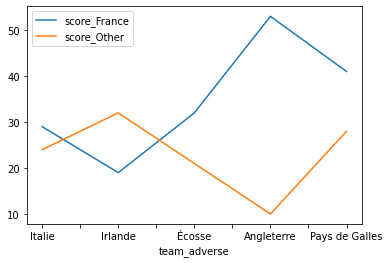

In [85]:
dfMatchesFrance.set_index('team_adverse')[['score_France', 'score_Other']].plot()

<AxesSubplot:xlabel='team_adverse'>

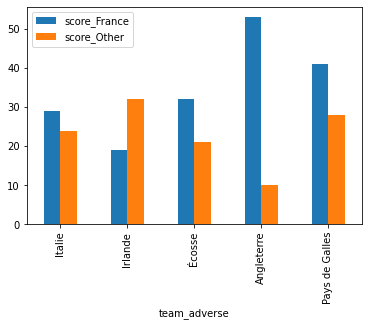

In [86]:
dfMatchesFrance.set_index('team_adverse')[['score_France', 'score_Other']].plot(kind='bar')

<AxesSubplot:xlabel='datetime_paris'>

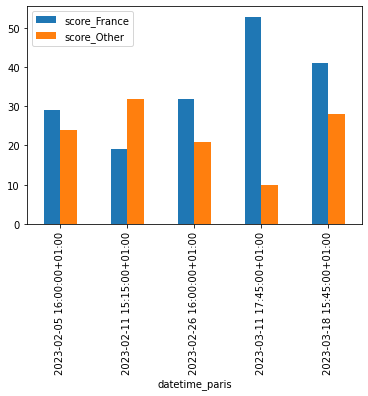

In [87]:
dfMatchesFrance.set_index('datetime_paris')[['score_France', 'score_Other']].plot(kind='bar')

### 5.2 Graduations
Avec numpy, créer une série de valeur régulière
- arange : entiers avec un pas
- linspace : flottants avec pas constant
- geomspace : série de flottants géométriques (pas multiplié)
- logspace : série de flottants logarithmique 

Liens:
- https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html
- https://matplotlib.org/stable/gallery/ticks_and_spines/tick-formatters.html
- https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

In [ ]:
np.logspace

In [90]:
x = np.arange(1,12,2) # pas de 2
x

array([ 1,  3,  5,  7,  9, 11])

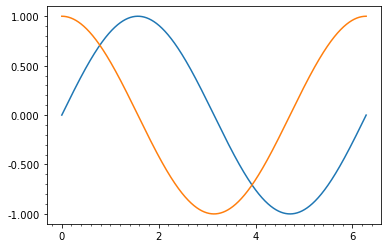

In [99]:
x = np.linspace(0, 2*np.pi, 10000) # nombres de valeurs 10000
y1 = np.sin(x)
y2 = np.cos(x)

# plt.plot(x, y1, x, y2)
fig, ax = plt.subplots()

# graduations sur les x (xaxis)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

# graduation principale sur les y (yaxis)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.3f"))
# graduation secondaire sur les y (yaxis)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# tracé
ax.plot(x, y1, x, y2)

In [93]:
np.sin(np.pi)

1.2246467991473532e-16

In [94]:
np.sin(x)

array([ 0.00000000e+00,  6.28381328e-04,  1.25676241e-03, ...,
       -1.25676241e-03, -6.28381328e-04, -2.44929360e-16])

## 6. Focus sur le groupby (merge de lignes)

In [101]:
columns_stats = [
        'Transformations',
        'Penalty Goals', 'Drops'
]
dfStatPlayersSummary = dStatPlayers.groupby(by=['guid', 'firstName', 'lastName'])[columns_stats].sum()
dfStatPlayersSummary

,,,Transformations,Penalty Goals,Drops
guid,firstName,lastName,,,
AB882295,Adam,Beard,0,0,0
AC249727,Ange,Capuozzo,0,0,0
AC437780,Alex,Cuthbert,0,0,0
AD427633,Antoine,Dupont,0,0,0
AD528464,Alex,Dombrandt,0,0,0
...,...,...,...,...,...
TW860822,Tomos,Williams,0,0,0
UA499525,Uini,Atonio,0,0,0
WN551420,WP,Nel,0,0,0


In [104]:
dfStatPlayersSummary.sort_values(by='Transformations', ascending=False).head(10)

,,,Transformations,Penalty Goals,Drops
guid,firstName,lastName,,,
TR524244,Thomas,Ramos,18,10,1
JS228312,Johnny,Sexton,10,5,0
FR608838,Finn,Russell,9,3,0
RB187137,Ross,Byrne,5,2,0
DB100356,Dan,Biggar,5,1,0
OF274612,Owen,Farrell,5,6,0
TA522224,Tommaso,Allan,4,7,0
BK512124,Blair,Kinghorn,3,0,0
SH226786,Leigh,Halfpenny,2,1,0


In [113]:
columns_stats = {
    'Transformations': ['sum', 'mean', 'min', 'max'],
    'Penalty Goals': 'sum', 
    'Drops': np.sum,
    'position': [ list, set ], 
    'starter': list,
    'uuid': 'first'
}
dfStatPlayersSummary2 = dStatPlayers.groupby(by=['guid', 'firstName', 'lastName']) \
                                    .agg(columns_stats) \
                                    .sort_values(by=('Transformations','sum'), ascending=False)
dfStatPlayersSummary2

Transformations               Penalty Goals Drops  \
                                        sum  mean min max           sum   sum   
guid     firstName lastName                                                     
TR524244 Thomas    Ramos                 18  3.60   1   6            10     1   
JS228312 Johnny    Sexton                10  2.50   2   3             5     0   
FR608838 Finn      Russell                9  2.25   1   3             3     0   
RB187137 Ross      Byrne                  5  1.00   0   3             2     0   
DB100356 Dan       Biggar                 5  1.25   0   3             1     0   
...                                     ...   ...  ..  ..           ...   ...   
GT324524 Gareth    Thomas                 0  0.00   0   0             0     0   
GT723244 George    Turner                 0  0.00   0   0             0     0   
HA370010 Henry     Arundell               0  0.00   0   0             0     0   
HJ337666 Huw       Jones                  0  0.00   0   0             0     0   
ZF741855 Zander    Fagerson               0  0.00   0   0             0     0   

                                         position            \
                                             list       set   
guid     firstName lastName                                   
TR524244 Thomas    Ramos     [15, 15, 15, 15, 15]      {15}   
JS228312 Johnny    Sexton        [10, 10, 10, 10]      {10}   
FR608838 Finn      Russell       [10, 10, 10, 10]      {10}   
RB187137 Ross      Byrne     [22, 22, 10, 22, 22]  {10, 22}   
DB100356 Dan       Biggar        [10, 10, 22, 10]  {10, 22}   
...                                           ...       ...   
GT324524 Gareth    Thomas          [1, 1, 17, 17]   {1, 17}   
GT723244 George    Turner         [2, 2, 2, 2, 2]       {2}   
HA370010 Henry     Arundell      [23, 23, 23, 11]  {11, 23}   
HJ337666 Huw       Jones     [13, 13, 13, 13, 13]      {13}   
ZF741855 Zander    Fagerson          [3, 3, 3, 3]       {3}   

                                                        starter  \
                                                           list   
guid     firstName lastName                                       
TR524244 Thomas    Ramos         [True, True, True, True, True]   
JS228312 Johnny    Sexton              [True, True, True, True]   
FR608838 Finn      Russell             [True, True, True, True]   
RB187137 Ross      Byrne     [False, False, True, False, False]   
DB100356 Dan       Biggar             [True, True, False, True]   
...                                                         ...   
GT324524 Gareth    Thomas            [True, True, False, False]   
GT723244 George    Turner        [True, True, True, True, True]   
HA370010 Henry     Arundell         [False, False, False, True]   
HJ337666 Huw       Jones         [True, True, True, True, True]   
ZF741855 Zander    Fagerson            [True, True, True, True]   

                                                             uuid  
                                                            first  
guid     firstName lastName                                        
TR524244 Thomas    Ramos     466a23fd-641f-42ec-a76f-5eb6241c138e  
JS228312 Johnny    Sexton    cc725e68-9ce3-4114-ac71-dd61bbf18b8e  
FR608838 Finn      Russell   6ac9665e-e06b-427b-9ac9-7298457c6e59  
RB187137 Ross      Byrne     a93c1ee2-b2e9-4d1d-ac55-78d52902a675  
DB100356 Dan       Biggar    ec7475d3-f5e0-4be4-800d-658c54dd38a7  
...                                                           ...  
GT324524 Gareth    Thomas    b535575b-a7cc-48ba-b871-8f3afa33f114  
GT723244 George    Turner    1f51f7be-4d7d-41dd-8d44-d4509dec6df0  
HA370010 Henry     Arundell  f7bbb58c-c37c-4773-a337-98eebaa22aa1  
HJ337666 Huw       Jones     7690401a-eb7b-46c6-a66f-7d321480ab37  
ZF741855 Zander    Fagerson  e98bfc75-19cf-48dd-bf99-316d2f4f1a75  

[192 rows x 10 columns]

In [111]:
dStatPlayers.columns

Index(['game_guid', 'team', 'uuid', 'guid', 'firstName', 'lastName',
       'position', 'starter', 'Minutes jouées', 'Transformations',
       'Passes décisives', 'Penalty Goals', 'Drops', 'Metres Made',
       'Ballons joués à la main', 'Possession Kicked (%)', 'Metres Kicked',
       'Ball played by hand (%)', 'Passes', 'Passes après contact',
       'Broken Tackles', 'Knock Ons', 'Plaqués faits', 'Plaquages manqués',
       'Tackle success (%)', 'Dominant Tackles (%)', 'Turnovers effectués',
       'Turnovers concédés', 'Handling errors', 'Pens conceded',
       'Offside penalties', 'Scrum penalties', 'Touches gagnées',
       'Lineouts stolen', 'Carton jaune', 'Carton rouge'],
      dtype='object')

## 7. Focus sur les jointures

In [114]:
dfMatches.head(2)

,guid,uuid,datetime,datetime_paris,round,teamA_name,teamA_shortName,teamB_name,teamB_shortName,score_teamA,...,htscore_teamB,status,minutes,referee_firstName,referee_lastName,referee_knownAs,venue_name,venue_location,venue_timezone,attendance
0,22WI1234,8a908178-2222-4952-9759-62f1d7d7ed6b,2023-02-04 14:15:00+00:00,2023-02-04 15:15:00+01:00,1,Pays de Galles,WALE,Irlande,IREL,10,...,27,Res,80,Karl,Dickson,Karl Dickson,Principality Stadium,Cardiff,Europe/London,74500
1,22ES1234,63d81950-41cd-43f4-b5ad-9ef1b68b673c,2023-02-04 16:45:00+00:00,2023-02-04 17:45:00+01:00,1,Angleterre,ENGL,Écosse,SCOT,23,...,12,Res,80,Paul,Williams,Paul Williams,Twickenham,London,Europe/London,0


In [115]:
dStatPlayers.head(2)

,game_guid,team,uuid,guid,firstName,lastName,position,starter,Minutes jouées,Transformations,...,Turnovers effectués,Turnovers concédés,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge
0,22WI1234,teamA,0a53a3d1-ed03-4d88-92e2-243e1f205908,LW454197,Liam,Williams,15,True,0,0,...,1,0,0,2,0,0,0,0,0,0
1,22WI1234,teamA,9251b023-6fe1-43e3-8606-a488a6e5269a,JA935900,Josh,Adams,14,True,0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
dfStatPlayersWithTeam = dStatPlayers.set_index('game_guid').join(dfMatches.set_index('guid')[['teamA_name', 'teamB_name']])
# rajouter une colonne team_name avec un where jouant sur les colonnes team, teamA_name, teamB_name
dfStatPlayersWithTeam.head(10)

,team,uuid,guid,firstName,lastName,position,starter,Minutes jouées,Transformations,Passes décisives,...,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge,teamA_name,teamB_name
22EF1234,teamA,78f48546-0f38-4395-80d6-e2f8f30766d1,FS380018,Freddie,Steward,15,True,0,0,0,...,0,1,1,0,3,0,0,0,Angleterre,France
22EF1234,teamA,deb43d78-4474-4e29-a274-8943fbb280b8,MM832184,Max,Malins,14,True,0,0,0,...,0,1,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,26025c8f-12f2-4c50-baf5-285f8c97fd5d,HS586007,Henry,Slade,13,True,0,0,0,...,1,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,cb70d545-3e11-4cf4-8df1-9d86f4b179ce,OL421360,Ollie,Lawrence,12,True,0,0,0,...,0,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,662ed20b-9f91-4f11-9764-b45675192be1,AW514875,Anthony,Watson,11,True,0,0,0,...,1,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,4bfa732c-8be7-4705-b87d-b10a0eb498ea,MS438642,Marcus,Smith,10,True,0,1,0,...,1,0,0,0,1,0,0,0,Angleterre,France
22EF1234,teamA,8ce0ac61-15e0-421d-a504-d4b25cb9124e,JV904195,Jack,van Poortvliet,9,True,0,0,0,...,2,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,7d113a7b-cd4e-4626-a06f-6ed4c66ba19e,EG908747,Ellis,Genge,1,True,0,0,0,...,2,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,b6714fbd-0112-4c19-b569-943365a262b2,JG594765,Jamie,George,2,True,0,0,0,...,0,0,0,0,0,0,0,0,Angleterre,France
22EF1234,teamA,a8fdf059-f4fd-46fa-b353-f6896b8f1e6d,KS314500,Kyle,Sinckler,3,True,0,0,0,...,0,3,0,0,0,0,0,0,Angleterre,France


In [122]:
dfStatPlayersWithTeam[dfStatPlayersWithTeam.lastName == 'Ramos']

,team,uuid,guid,firstName,lastName,position,starter,Minutes jouées,Transformations,Passes décisives,...,Handling errors,Pens conceded,Offside penalties,Scrum penalties,Touches gagnées,Lineouts stolen,Carton jaune,Carton rouge,teamA_name,teamB_name
22EF1234,teamB,466a23fd-641f-42ec-a76f-5eb6241c138e,TR524244,Thomas,Ramos,15,True,0,6,0,...,0,0,0,0,0,0,0,0,Angleterre,France
22FS1234,teamA,466a23fd-641f-42ec-a76f-5eb6241c138e,TR524244,Thomas,Ramos,15,True,0,3,0,...,0,1,1,0,0,0,0,0,France,Écosse
22FW1234,teamA,466a23fd-641f-42ec-a76f-5eb6241c138e,TR524244,Thomas,Ramos,15,True,0,5,2,...,1,0,0,0,0,0,0,0,France,Pays de Galles
22IF1234,teamB,466a23fd-641f-42ec-a76f-5eb6241c138e,TR524244,Thomas,Ramos,15,True,0,3,0,...,2,1,0,0,0,0,0,0,Italie,France
22IF5678,teamB,466a23fd-641f-42ec-a76f-5eb6241c138e,TR524244,Thomas,Ramos,15,True,0,1,0,...,1,1,0,0,0,0,0,0,Irlande,France
